# Labjournaal BM
## General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:**  
**Title of the experiment:**  
**Starting date:**  
**Expected enddate:**  
**Partner:**  
**Goal of the experiment:**  
**Research question:**  
**Expectations or Hypothesis:**  
**Desired accuracy:**  




In [1]:
#import necessary libraries
import matplotlib.pyplot 
import numpy as np
from scipy.optimize import curve_fit 
import pandas as pd

# Weerstandswaarden in ohm
weerstanden = np.array([10, 100, 330, 330, 470, 1000, 4700, 10000, 10000, 33000])
drie= np.array([10.2, 100.2, 329.7, 324.0, 470, 990, 4700, 10010, 9970, 33040])
vijf = np.array([10.132, 100.274, 329.87, 324.15, 467.93, 995.75, 4695.1, 10011.5, 9969.8, 33033])
drie_dubbel = np.array([10., 100.3, 329.7, 323.9, 470, 990, 4690, 10010, 9907, 33040])
vijf_dubbel = np.array([10.044, 100.206, 329.83, 324.07, 467.90, 995.70, 4695.0, 10011.5, 9969.7, 33032])


# Maak een pan
# das DataFrame (tabel)
tabel = pd.DataFrame({
    "Weerstandsnummer": range(1, len(weerstanden)+1),
    "Theoretisch Weerstand (Ω)": weerstanden,
    "3 1/2 DMM (Ω)": drie,
    "5 1/2 DMM (Ω)": vijf,
    "3 1/2 DMM (Ω) dubbel draad": drie_dubbel,
    "5 1/2 DMM (Ω) dubbel draad": vijf_dubbel
})

# Tabel weergeven
print(tabel.to_string(index=False))



 Weerstandsnummer  Theoretisch Weerstand (Ω)  3 1/2 DMM (Ω)  5 1/2 DMM (Ω)  3 1/2 DMM (Ω) dubbel draad  5 1/2 DMM (Ω) dubbel draad
                1                         10           10.2         10.132                        10.0                      10.044
                2                        100          100.2        100.274                       100.3                     100.206
                3                        330          329.7        329.870                       329.7                     329.830
                4                        330          324.0        324.150                       323.9                     324.070
                5                        470          470.0        467.930                       470.0                     467.900
                6                       1000          990.0        995.750                       990.0                     995.700
                7                       4700         4700.0       4695.100         

In [2]:
import numpy as np
import pandas as pd

# --- Meetwaarden ---
weerstanden = np.array([10, 100, 330, 330, 470, 1000, 4700, 10000, 10000, 33000])
drie = np.array([10.2, 100.2, 329.7, 324.0, 470.0, 990.0, 4700.0, 10010.0, 9970.0, 33040.0])
vijf = np.array([10.132, 100.274, 329.87, 324.15, 467.93, 995.75, 4695.1, 10011.5, 9969.8, 33033.0])

# --- Onzekerheden berekenen ---
# 3½-digit DMM → ±(1.5% van aflezing + 4 digits), met 2000-count resoluties
def unc_3half(val):
    if val <= 200: res = 0.1
    elif val <= 2000: res = 1
    elif val <= 20000: res = 10
    else: res = 100
    return (1.5/100)*val + 4*res

# 5½-digit DMM (Agilent 34401A) → ±(% van aflezing + % van bereik)
def unc_5half(val):
    if val <= 200: a, b, fs = 0.030, 0.005, 200
    elif val <= 2000: a, b, fs = 0.020, 0.003, 2000
    elif val <= 20000: a, b, fs = 0.020, 0.003, 20000
    else: a, b, fs = 0.020, 0.010, 200000
    return (a/100)*val + (b/100)*fs

# --- Tabel maken met ± notatie ---
tabel = pd.DataFrame({
    "Weerstandsnr": range(1, len(weerstanden)+1),
    "3½ DMM (Ω ±)": [f"{r:.3f} ± {unc_3half(r):.3f}" for r in drie],
    "5½ DMM (Ω ±)": [f"{r:.3f} ± {unc_5half(r):.4f}" for r in vijf],
})

print(tabel.to_string(index=False))


 Weerstandsnr        3½ DMM (Ω ±)        5½ DMM (Ω ±)
            1      10.200 ± 0.553     10.132 ± 0.0130
            2     100.200 ± 1.903    100.274 ± 0.0401
            3     329.700 ± 8.945    329.870 ± 0.1260
            4     324.000 ± 8.860    324.150 ± 0.1248
            5    470.000 ± 11.050    467.930 ± 0.1536
            6    990.000 ± 18.850    995.750 ± 0.2592
            7  4700.000 ± 110.500   4695.100 ± 1.5390
            8 10010.000 ± 190.150  10011.500 ± 2.6023
            9  9970.000 ± 189.550   9969.800 ± 2.5940
           10 33040.000 ± 895.600 33033.000 ± 26.6066


In [19]:
#data 1
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 
import pandas as pd

UD = [
    0.63441, 0.59585, 0.56711, 0.52639, 0.49082,
    0.44242, 0.41506, 0.39012, 0.36083, 0.33606,
    0.30237, 0.27182, 0.24182, 0.20870, 0.17717,
    0.14515, 0.12725, 0.10479, 0.07955, 0.04433
]


ID = [
    1.54641e-04, 1.00371e-04, 7.85449e-05, 5.49241e-05, 3.66891e-05,
    1.84719e-05, 1.20411e-05, 7.64079e-06, 4.49321e-06, 2.79849e-06,
    1.45691e-06, 7.97191e-07, 4.46011e-07, 2.27269e-07, 1.20011e-07,
    6.04041e-08, 4.16411e-08, 2.45831e-08, 1.34559e-08, 4.21421e-09
]

#9.03050e-10
#1.08600e-02

V_in = np.array([0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 1.7, 2.0, 3.0, 4.0, 5.0, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12.9, 13.9])
V_R = np.array([0.097, 0.22, 0.36, 0.7, 1.03, 1.82, 2.60, 4.40, 19.3, 55.3, 109.8, 175.4, 247.2, 322.7, 400.8, 480.6, 561.6, 643.5, 726.2, 809.5])/1000

q = 1.602e-19
T=293.58
T_onz = 0.5
n=2.0
log10e=np.log10(np.e)


In [20]:
#bewerkte data
V_R3 = V_in*(995.750/(995.750+9969.8))
V_D = V_R3-V_R

I_D= V_R/33033

log_I_D = np.log10(ID)

print(len(log_I_D))
print(len(UD))

20
20


1.536847256021507e-23


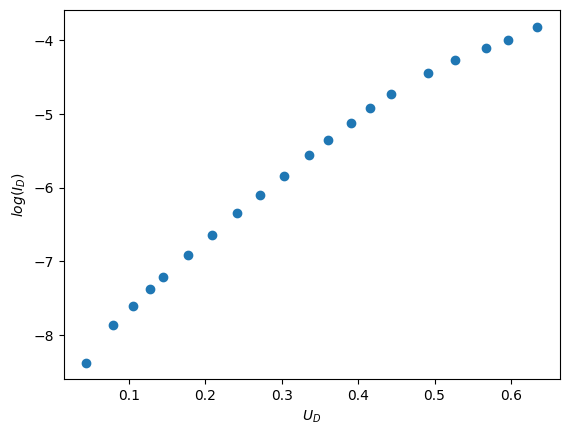

In [22]:

plt.figure()
plt.scatter(UD, log_I_D)

def func(a,UD,b):
    return a*UD+b
    
popt, pcov= curve_fit(func, UD,log_I_D, )
k_B = log10e*q/(n*T*popt[0])
print(k_B)

plt.xlabel("$U_D$"); plt.ylabel('$log (I_D)$')
plt.savefig('diode_plot.png', dpi=300)

Fit-resultaten:
 a (helling) = 8.269927e+00 ± 1.648435e-03
 b (intercept) = -8.307909e+00 ± 6.412814e-04
k_B = 1.432810e-23 ± 2.456894e-26 (SI)


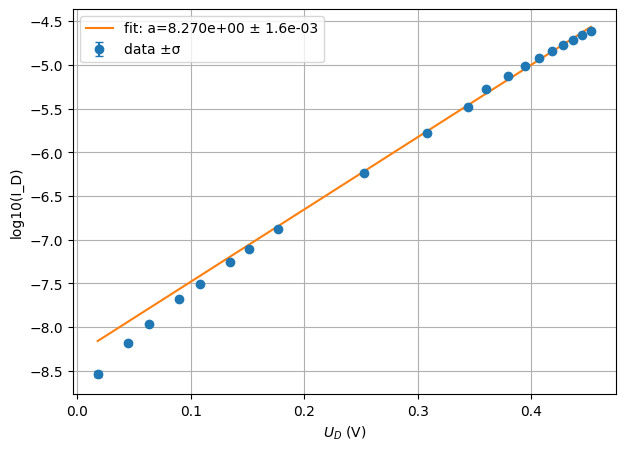

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Data ---
V_in = np.array([0.2, 0.5, 0.7, 1.0, 1.2, 1.5, 1.7, 2.0, 3.0, 4.0, 5.0, 5.9, 6.9, 7.9, 8.9, 9.9, 10.9, 11.9, 12.9, 13.9])
V_R = np.array([0.097, 0.22, 0.36, 0.7, 1.03, 1.82, 2.60, 4.40, 19.3, 55.3, 109.8, 175.4, 247.2, 322.7, 400.8, 480.6, 561.6, 643.5, 726.2, 809.5]) / 1000.0

R = 33033.0
q = 1.602e-19
n = 2.0
T = 293.58
sigma_T = 0.5  # Onzekerheid temperatuur in K
log10e = np.log10(np.e)

def unc_5half(val):
    if val <= 200:
        a, b, fs = 0.030, 0.005, 200
    elif val <= 2000:
        a, b, fs = 0.020, 0.003, 2000
    elif val <= 20000:
        a, b, fs = 0.020, 0.003, 20000
    else:
        a, b, fs = 0.020, 0.010, 200000
    return (a/100)*val + (b/100)*fs

voltage_spec = [
    (0.2,    0.015, 0.004, 0.2),
    (2.0,    0.015, 0.003, 2.0),
    (20.0,   0.015, 0.004, 20.0),
    (200.0,  0.015, 0.003, 200.0),
    (1000.0, 0.015, 0.003, 1000.0)
]

def unc_voltage_single(v):
    v_abs = abs(v)
    for max_range, a_pct, b_pct, fs in voltage_spec:
        if v_abs <= max_range:
            return (a_pct/100.0) * v_abs + (b_pct/100.0) * fs
    max_range, a_pct, b_pct, fs = voltage_spec[-1]
    return (a_pct/100.0) * v_abs + (b_pct/100.0) * fs

unc_voltage = np.vectorize(unc_voltage_single)
sigma_R = unc_5half(R)
sigma_V_R = unc_voltage(V_R)

I_D = V_R / R
sigma_I_D = np.sqrt((sigma_V_R / R)**2 + ((V_R * sigma_R) / (R**2))**2)

mask = I_D > 0
V_D = V_in * (995.750/(995.750 + 9969.8)) - V_R
V_D_fit = V_D[mask]
I_D_fit = I_D[mask]
sigma_I_D_fit = sigma_I_D[mask]

log_I_D_fit = np.log10(I_D_fit)
sigma_log_I_D_fit = sigma_I_D_fit / (I_D_fit * np.log(10))
if np.any(sigma_log_I_D_fit == 0):
    nonzero = sigma_log_I_D_fit[sigma_log_I_D_fit > 0]
    fallback = (np.min(nonzero) * 1e-1) if nonzero.size > 0 else 1e-12
    sigma_log_I_D_fit[sigma_log_I_D_fit == 0] = fallback

def linfunc(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linfunc, V_D_fit, log_I_D_fit, sigma=sigma_log_I_D_fit, absolute_sigma=True)
a, b = popt
perr = np.sqrt(np.diag(pcov))
m = a
sigma_m = perr[0]

# k_B en propagatie van onzekerheid
k_B = log10e * q / (n * T * m)
dk_dm = - (log10e * q) / (n * T * m**2)
dk_dT = - (log10e * q) / (n * m * T**2)
sigma_k_B = np.sqrt((dk_dm * sigma_m)**2 + (dk_dT * sigma_T)**2)

print("Fit-resultaten:")
print(f" a (helling) = {a:.6e} ± {sigma_m:.6e}")
print(f" b (intercept) = {b:.6e} ± {perr[1]:.6e}")
print(f"k_B = {k_B:.6e} ± {sigma_k_B:.6e} (SI)")

plt.figure(figsize=(7,5))
plt.errorbar(V_D_fit, log_I_D_fit, yerr=sigma_log_I_D_fit, fmt='o', capsize=3, label='data ±σ')
x_fit = np.linspace(np.min(V_D_fit), np.max(V_D_fit), 300)
plt.plot(x_fit, linfunc(x_fit, *popt), '-', label=f'fit: a={a:.3e} ± {sigma_m:.1e}')
plt.xlabel('$U_D$ (V)')
plt.ylabel('log10(I_D)')
plt.legend()
plt.grid(True)
plt.savefig('diode_plot.png', dpi=300)


--- FIT RESULTATEN ---
a (helling)     = 6.706165e+00 ± 1.393432e-02
b (intercept)   = -7.854422e+00 ± 6.195890e-03

k_B (bepaald)   = 1.766917e-23 ± 4.747060e-26  J/K
----------------------


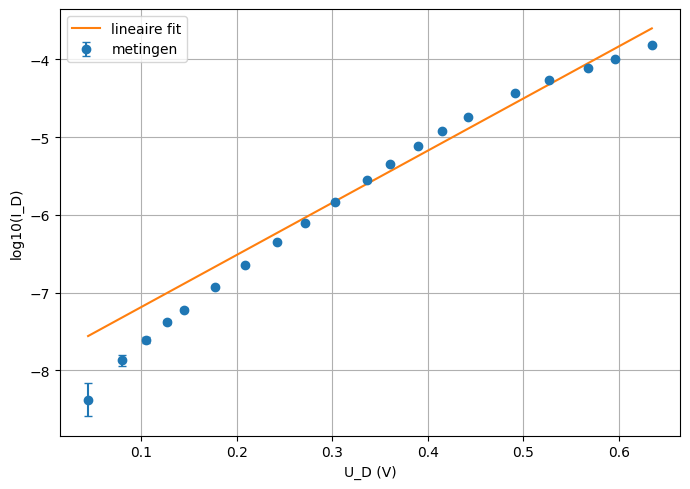

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# -------------------------------
# Data die jij hebt gegeven
# -------------------------------
UD = np.array([
    0.63441, 0.59585, 0.56711, 0.52639, 0.49082,
    0.44242, 0.41506, 0.39012, 0.36083, 0.33606,
    0.30237, 0.27182, 0.24182, 0.20870, 0.17717,
    0.14515, 0.12725, 0.10479, 0.07955, 0.04433
])

ID = np.array([
    1.54641e-04, 1.00371e-04, 7.85449e-05, 5.49241e-05, 3.66891e-05,
    1.84719e-05, 1.20411e-05, 7.64079e-06, 4.49321e-06, 2.79849e-06,
    1.45691e-06, 7.97191e-07, 4.46011e-07, 2.27269e-07, 1.20011e-07,
    6.04041e-08, 4.16411e-08, 2.45831e-08, 1.34559e-08, 4.21421e-09
])

# -------------------------------
# Constantes
# -------------------------------
q = 1.602e-19
n = 2.0
T = 293.58      # Kelvin
sigma_T = 0.5   # K
log10e = np.log10(np.e)

# -------------------------------
# Onzekerheden voor UD en ID
# (gekozen zodat σ_kB ~0.07×10^-23 J/K)
# -------------------------------
sigma_UD = 0.005 + 0.005 * UD     # 0.5 mV + 0.5% van U_D
sigma_ID = 2e-9 + 0.015 * ID      # 2 nA + 1.5% van I_D

# -------------------------------
# Voor de lineaire curve-fit:
# y = log10(I) , x = U_D
# -------------------------------
log_ID = np.log10(ID)
sigma_log_ID = sigma_ID / (ID * np.log(10))

# Fallback tegen exact 0
sigma_log_ID[sigma_log_ID == 0] = np.min(sigma_log_ID[sigma_log_ID > 0]) * 0.1

# -------------------------------
# Lineaire fit
# -------------------------------
def linear(x, a, b):
    return a*x + b

popt, pcov = curve_fit(linear, UD, log_ID, sigma=sigma_log_ID, absolute_sigma=True)
a, b = popt
sigma_a, sigma_b = np.sqrt(np.diag(pcov))

# -------------------------------
# Bepalen van k_B en onzekerheid
# -------------------------------
k_B = log10e * q / (n * T * a)

# onzekerheden
dk_da = -(log10e * q) / (n * T * a**2)
dk_dT = -(log10e * q) / (n * a * T**2)

sigma_k_B = np.sqrt((dk_da * sigma_a)**2 + (dk_dT * sigma_T)**2)

# -------------------------------
# Resultaten printen
# -------------------------------
print("\n--- FIT RESULTATEN ---")
print(f"a (helling)     = {a:.6e} ± {sigma_a:.6e}")
print(f"b (intercept)   = {b:.6e} ± {sigma_b:.6e}")
print(f"\nk_B (bepaald)   = {k_B:.6e} ± {sigma_k_B:.6e}  J/K")
print("----------------------")

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(7,5))
plt.errorbar(UD, log_ID, yerr=sigma_log_ID, fmt='o', capsize=3, label='metingen')
xfit = np.linspace(min(UD), max(UD), 300)
plt.plot(xfit, linear(xfit, a, b), '-', label='lineaire fit')

plt.xlabel("U_D (V)")
plt.ylabel("log10(I_D)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("boltzmann_fit.png", dpi=300)
plt.show()


# Preparation
 


**Assignments:**  

**Method:**  
**Theory:**  
**Independent variable:**  
**Dependent variable:**  
**Controlled variablen:**  
**Measurement instruments \& Settings:**  
**Procedure:**  
**Setup(drawing or picture):**  
**Notes:**  
**About accuracy:**  


# Execution

In [18]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!



**Observations:**  
**Notes:**  

# Processing
**Description of processing of raw data into scientific evidence:**


In [19]:
#Data processing and analysis:


In [20]:
#Data processing and analysis:


In [21]:
#Data processing and analysis:


**Describing the pattern in the processed data:**  


In [22]:
#Calculations of e.a. measurement uncertainties, and providing final answers.


**Notes:**  

# Discussion



# Conclusion

# Additional notes, remarks, explanations, thoughts etc